# Z-test

## 1. Definition- 
#### Z-test is a statistical test that is used to determine whether the mean of a sample is significantly different from a known population mean when the population standard deviation is known. It is particularly useful when the sample size is large (>30).

### 2. Purpose  -
 The z-test is run on data that roughly fit the normal distribution, i.e., for data that is not skewed. 

### 3. When can we use z-test- 
 a) Sample size>**30**     and
 
 b) The standard deviation of the population should be known. ## important ##
 
 c) Samples should be drawn at random from the population.
 
 d) Samples that are drawn from the population should be ***independent*** of each other.
 
 e) The data should be normally distributed, however, for a large sample size, it is assumed to have a normal distribution because of **central limit theorem**.
 

### 4. Where can z test be done-

a) Test whether two means are the same (the null hypothesis)

b) Determine if the difference between the mean of a sample and the mean of a population is statistically significant

c) Check whether the means of two populations are equal to each other.

## Steps

1) State the Null hypothesis

2) State the Alternate Hypothesis

3) Confidence Interval & Decision Boundary

4) Statistical Analysis

5) Conclusion

# One tailed test

Example 1) A factory manufactures bulbs with an average warrenty of 5 years and standard deviation of 0.50. A worker believes that the bulb will manufacture in less than 5 years. He tests a sample of 40 bulbs and found the average time to be 4.8 years. 

a) State the Null and Alternate hypothesis.

b) At a 2% Significance level, is there anough evidence to support the idea that the warrenty should be revised?

In [31]:
import numpy as np
import scipy.stats as stats
from numpy.random import randn
import seaborn as sns 
from scipy.stats import norm

In [32]:
population_mean = 5
population_standard_deviation = 0.5
sample_mean = 4.8
sample_size = 40
Confidence_interval = 0.98
significance_value = 0.02
alpha = 0.02 # One tailed test

### 1) Null_Hypothesis= Ho: u = 5
### 2) Alternate_Hypothesis = Hi: u < 5 (One_tailed_test)

### where, Ho = Null Hypothesis, Hi = Alternate Hypothesis and u = mean

### 3 a) Confidence Interval

In [33]:
Confidence_interval = 0.98 # Since it is One tailed left sided test, alpha = significance value
z_crictical = stats.norm.ppf(alpha)
z_crictical 

-2.053748910631823

### 3 b) Decision Boundary- 

Since it is a One tailed test then decision boundary will be greater than 2.05, that is z_crictical should be less than Z_score.

### 4) Statistical Analysis 

In [34]:
Z_score = (sample_mean-population_mean)/(population_standard_deviation/np.sqrt(sample_size))
Z_score

-2.5298221281347057

### 5) Conclusion Using Z score

In [35]:
if Z_score<z_crictical:
    print("reject the null hyphothesis")
else:
    print("fail to reject the null hyphothesis")

reject the null hyphothesis


### Conclusion Using P value

## p Value
(probability of the bulbs warrenty to be 5 years) 

1) p_value>Significance value= We fail to reject the hypothesis
2) p_value < Significance value = We reject Null Hypothesis

In [36]:
p_value=norm.sf(abs(Z_score))
p_value

0.0057060181930007866

In [37]:
if p_value<significance_value:
    print("reject the null hyphothesis")
    
else:
    print("fail to reject the null hyphothesis")

reject the null hyphothesis


Example 1) The average heights of all the residents in the city is 168 with a standard deviation of 3.9. A doctor believes the mean to be different. He measured the heights of 36 individuals and found the average height to be 169.5.
1) State the Null Hypothesis and Alternate Hypothesis
2) At a 95% Confidence Interval is there enough evidence to reject the Null hypothesis.

# Two tailed test

In [38]:
population_mean = 168
population_standard_deviation = 3.9
sample_mean = 169.5
sample_size = 36
Confidence_interval = 0.95
significance_value = 0.05
alpha = 0.05/2 # two tailed test

### 1) Null_Hypothesis= Ho: u = 168
### 2) Alternate_Hypothesis = Hi: u! = 168 (Two_tailed_test)
### where, Ho = Null Hypothesis, Hi = Alternate Hypothesis and u = mean

### 3 a) Confidence Interval

In [39]:
Confidence_interval = 0.95 # Since it is two tailed test alpha = (significance value/2)
z_crictical = stats.norm.ppf(1-alpha)
z_crictical # approximately 1.96

1.959963984540054

### 3 b) Decision Boundary- 

Since it is a two tailed test then decision boundary will be between -1.96 and +1.96

In [40]:
z_crictical_positive = 1.959963984540054
z_crictical_negative = -1.959963984540054

### 4) Statistical Analysis 

In [41]:
Z_score = (sample_mean-population_mean)/(population_standard_deviation/np.sqrt(sample_size))
Z_score

2.3076923076923075

If Z score falls between -z_crictical_positive(z_crictical_negative) and +1.959963984540054(z_crictical_positive) then we fail to reject the null hypothesis and if not then we reject the Null Hypothesis.

### 5) Conclusion Using Z score

In [42]:
if z_crictical_negative>Z_score or Z_score>z_crictical_positive:
    print("reject the null hyphothesis")
else:
    print("fail to reject the null hyphothesis")

reject the null hyphothesis


### Conclusion Using P value

# p Value
(probability of residents in the city to have height 168cm) 

1) p_value>Significance value= We fail to reject the hypothesis
2) p_value < Significance value = We reject Null Hypothesis

In [43]:
from scipy.stats import norm

In [44]:
p_value=norm.sf(abs(Z_score))
p_value

0.010508128113759337

In [45]:
# for two tailed test
p_val_2_tail = p_value*2
p_val_2_tail

0.021016256227518675

In [46]:
if p_val_2_tail<significance_value:
    print("reject the null hyphothesis")
    
else:
    print("fail to reject the null hyphothesis")

reject the null hyphothesis


# Z test Using Real world Datasets

### Q3) Some new survey/research claims that the average age of passengers in Titanic who survived is greater than 28.

a) State the Null and Alternate hypothesis.

b) At a 5% Significance level, is there anough evidence to support the idea that the Age of survivors is greater than 28?

# One tailed test

In [47]:
import pandas as pd
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint

In [48]:
df1 = pd.read_csv("titanic_train.csv")

In [49]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First, let’s look at the data in hand. As shown below(Graph 1), the population is not normally distributed. So we as per the Central Limit Theorem will take 60 random sampling distribution of 60 sample mean of passengers who survived which will approximate to a normal distribution(Graph 2)

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

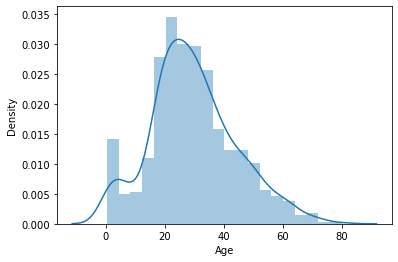

In [51]:
Age_data = df1[df1["Age"].notna()].Age
sns.distplot(Age_data)
# The data is not normally distributed


#### Filtering the data of Population that survived

In [52]:
survived_data = df1[df1['Survived']==1]
survived_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### Filtering the data of Population that survived having Known Age(Not Null)

In [53]:
survived_data[survived_data["Age"].notna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Sample Standard Distribution of data

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

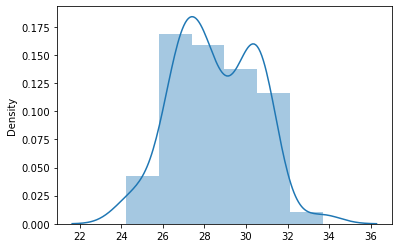

In [54]:
sample_population_list = []
for i in range(60):
    sample_population_list_temp = np.random.choice(survived_data[survived_data['Age'].notna()].Age,60).mean()
    sample_population_list.append(sample_population_list_temp)
    
sns.distplot(sample_population_list)

### 1. Ho: Average age of passengers in Titanic is less than 28:μ0 <=28

### 2. Hi : New research claims mean age is greater than 28: μ1 > 28 (One_Tailed_Right_sided_test)


### where, Ho = Null Hypothesis, Hi = Alternate Hypothesis and u = mean

In [55]:
mean_H0 = 28
significance_value = 0.05
CI = 0.95

### 3 a) Confidence Interval

In [56]:
Confidence_interval = 0.95 # Since it is One tailed right sided test, alpha = significance value
z_crictical = stats.norm.ppf(1-significance_value)
z_crictical 

1.6448536269514722

### 3 b) Decision Boundary- 

Since it is a Right sided One tailed test then decision boundary will be less than 1.64485, that is z_crictical should be greater than Z_score.

### 4) Statistical Analysis 

In [57]:
mean_H0 = 28
Z_score, p_value = ztest(sample_population_list, value=mean_H0,alternative='larger')
print("p_value = ", p_value)
print('z_score = ',Z_score)

p_value =  0.017692235044201234
z_score =  2.1039309572930374


### 5) Conclusion Using Z score

In [58]:
if Z_score>z_crictical:
    print("reject the null hyphothesis")
else:
    print("fail to reject the null hyphothesis")

reject the null hyphothesis


### p Value

#### 5) Conclusion Using p Value

In [59]:
if p_value<significance_value:
    print("reject the null hyphothesis")
    
else:
    print("fail to reject the null hyphothesis")

reject the null hyphothesis


Source: https://mahima-s.medium.com/hypothesis-test-z-test-explained-with-implementation-of-titanic-kaggle-dataset-71e4f7129a0d